## Predicting Loan Defaulters

## DESCRIPTION  
Data Analysis is the process of creating a story using the data for easy and effective communication. It mostly utilizes visualization methods like plots, charts, and tables to convey what the data holds beyond the formal modeling or hypothesis testing task.

Domain: Finance

Read the information given below and also refer to the data dictionary provided separately in an excel file to build your understanding.

 
Problem Statement

Financial institutions incur significant losses due to the default of vehicle loans. This has led to the tightening up of vehicle loan underwriting and increased vehicle loan rejection rates.
The need for a better credit risk scoring model is also raised by these institutions. This warrants a study to estimate the determinants of vehicle loan default.

There is 1 dataset data that have 41 attributes.
You are required to determine and examine factors that affected the ratio of vehicle loan defaulters. Also, use the findings to create a model to predict the potential defaulters.


### Importing, Understanding, and Inspecting Data :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
os.chdir('Desktop')

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.head(5)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,01-06-1988,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,14-07-1994,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


### Data Preliminary analysis:

In [5]:
data.shape

(233154, 41)

In [6]:
data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [7]:
data.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [8]:
##Employment.Type column have more than 70% null values and it's categorical variable hence we are filling it with mode.
data["Employment.Type"].fillna(value=data["Employment.Type"].mode()[0],inplace=True)

In [9]:
data.isnull().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

As we can see above there are no null values in the dataset

In [10]:
#renaming some of the column names
data.rename(columns={"Date.of.Birth":"Date_of_birth",
                     "Employment.Type":"Employment_type",
                    "DisbursalDate":"Disbursal_Date",
                    "PERFORM_CNS.SCORE":"PERFORM_CNS_SCORE",
                    "PERFORM_CNS.SCORE.DESCRIPTION":"PERFORM_CNS_SCORE_DESCRIPTION",
                    "PRI.NO.OF.ACCTS":"PRI_NO_OF_ACCTS",
                    "PRI.ACTIVE.ACCTS":"PRI_ACTIVE_ACCTS",
                    "PRI.OVERDUE.ACCTS":"PRI_OVERDUE_ACCTS",
                    "PRI.CURRENT.BALANCE":"PRI_CURRENT_BALANCE",
                    "PRI.SANCTIONED.AMOUNT":"PRI_SANCTIONED_AMOUNT",
                    "PRI.DISBURSED.AMOUNT":"PRI_DISBURSED_AMOUNT",
                    "SEC.NO.OF.ACCTS":"SEC_NO_OF_ACCTS",
                    "SEC.ACTIVE.ACCTS":"SEC_ACTIVE_ACCTS",
                    "SEC.OVERDUE.ACCTS":"SEC_OVERDUE_ACCTS",
                    "SEC.CURRENT.BALANCE":"SEC_CURRENT_BALANCE",
                    "SEC.SANCTIONED.AMOUNT":"SEC_SANCTIONED_AMOUNT",
                    "SEC.DISBURSED.AMOUNT":"SEC_DISBURSED_AMOUNT",
                    "PRIMARY.INSTAL.AMT":"PRIMARY_INSTAL_AMT",
                    "SEC.INSTAL.AMT":"SEC_INSTAL_AMT",
                    "NEW.ACCTS.IN.LAST.SIX.MONTHS":"NEW_ACCTS_IN_LAST_SIX_MONTHS",
                    "DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS":"DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS",
                    "AVERAGE.ACCT.AGE":"AVERAGE_ACCT_AGE",
                    "CREDIT.HISTORY.LENGTH":"CREDIT_HISTORY_LENGTH",
                    "NO.OF_INQUIRIES":"NO_OF_INQUIRIES"},inplace=True)
                    


In [11]:
data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date_of_birth',
       'Employment_type', 'Disbursal_Date', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'loan_default'],
      dtype='object')

### We have converted all column names in same format with underscore as shown above

## Performing EDA:

In [12]:
data.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [13]:
#finding duplicates
duplicate=data[data.duplicated()]

In [14]:
duplicate

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_birth,Employment_type,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default


### We don't have any duplicate data in this dataset as shown above

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_default', ylabel='count'>

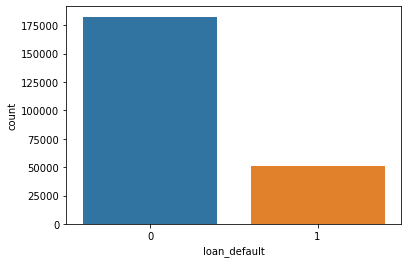

In [15]:
#Dependent varibale loan_default distribution as given below
import seaborn as sns
sns.countplot(data["loan_default"])

Compare to loan default not default count is more

### Study the distribution of the target variable across various categories like branch, city, state, branch, supplier, manufacturer, etc.

<AxesSubplot:xlabel='loan_default', ylabel='branch_id'>

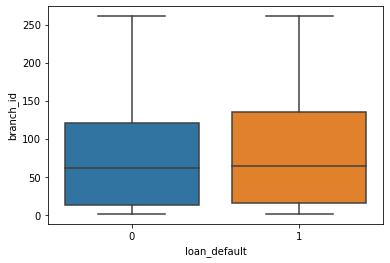

In [16]:
sns.boxplot(data=data,y='branch_id',x='loan_default')

<AxesSubplot:xlabel='loan_default', ylabel='Current_pincode_ID'>

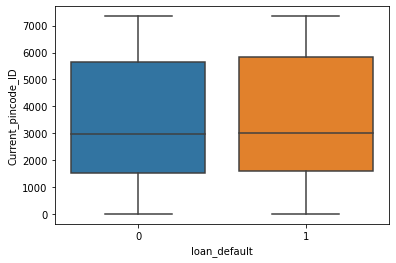

In [17]:
sns.boxplot(data=data,y='Current_pincode_ID',x='loan_default')

<AxesSubplot:xlabel='loan_default', ylabel='State_ID'>

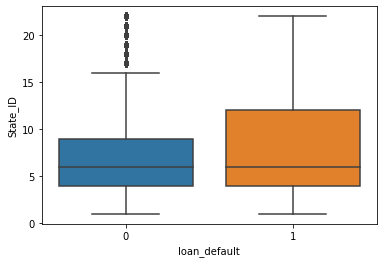

In [18]:
sns.boxplot(data=data,y='State_ID',x='loan_default')

<AxesSubplot:xlabel='loan_default', ylabel='supplier_id'>

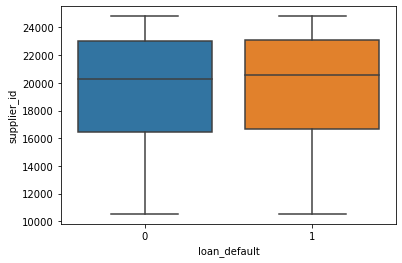

In [19]:
sns.boxplot(data=data,y='supplier_id',x='loan_default')

<AxesSubplot:xlabel='loan_default', ylabel='manufacturer_id'>

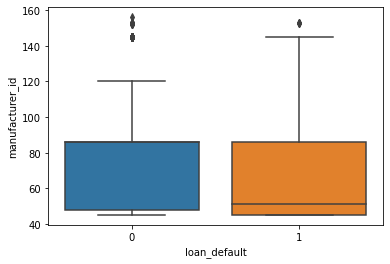

In [20]:
sns.boxplot(data=data,y='manufacturer_id',x='loan_default')

### From above charts we cannot conclude whether particular variable affecting for loan defaulters or not

What are the different employment types given in the data? Can a strategy be developed to fill in the missing values (if any)?  Use pie charts to express the different types of employment that define the defaulters and non-defaulters

In [21]:
###Employment type details:
data["Employment_type"].value_counts()

Self employed    135296
Salaried          97858
Name: Employment_type, dtype: int64

As shown above self employed are more compare to salaried

### Has age got anything to do with defaulting? What is the distribution of age w.r.t. to the defaulters and non-defaulters?

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date_of_birth                        233154 non-null  object 
 9   Employment_type                      233154 non-null  object 
 10  Disbursal_Date                       233154 non-null  object 
 11  State_ID     

In [23]:
import datetime
from datetime import datetime

We don't have specific age column in dataset so we have to bring age column from the date columns which are given in the dataset. Also Date columns have datatype as object so we have convert them into date.

In [24]:
data['Date_of_birth']=pd.to_datetime(data['Date_of_birth'])
data['Disbursal_Date']=pd.to_datetime(data['Disbursal_Date'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_5308\3125621558.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date_of_birth']=pd.to_datetime(data['Date_of_birth'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_5308\3125621558.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Disbursal_Date']=pd.to_datetime(data['Disbursal_Date'])


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Date_of_birth                        233154 non-null  datetime64[ns]
 9   Employment_type                      233154 non-null  object        
 

In [26]:
#finding age from date of birth and disbursal date
data["Age"]=data["Disbursal_Date"]-data["Date_of_birth"]

In [27]:
data.head(5)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_birth,Employment_type,...,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default,Age
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,12485 days
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,11825 days
2,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,Self employed,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,14989 days
3,529269,46349,61500,76.42,67,22807,45,1502,1988-01-06,Salaried,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,11218 days
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,8793 days


In [28]:
###converting into years
import numpy as np
data["Age"]=data["Disbursal_Date"]-data["Date_of_birth"]
data["Age"]=data["Age"]/np.timedelta64(1,'Y')

In [29]:
data.head(5)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_birth,Employment_type,...,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default,Age
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,34.182769
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,32.375750
2,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,Self employed,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,41.038488
3,529269,46349,61500,76.42,67,22807,45,1502,1988-01-06,Salaried,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,30.713841
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,24.074416


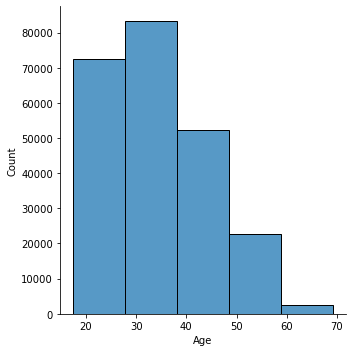

In [30]:
###Age Distribution
sns.displot(data['Age'],bins=5)

From above chart we can say that age group 20 to 40 have high requirement for loans

### What type of ID was presented by most of the customers as proof?

In [31]:
data["State_ID"].value_counts()

4     44870
3     34078
6     33505
13    17884
9     16022
8     14197
5     10177
14     9414
1      8936
7      6786
11     6721
18     5412
15     5049
12     4210
2      4160
17     3991
10     3605
16     2685
19     1035
20      185
21      156
22       76
Name: State_ID, dtype: int64

In [32]:
data["Employee_code_ID"].value_counts()

2546    628
620     502
255     494
130     408
2153    401
       ... 
3766      1
350       1
3280      1
3742      1
3052      1
Name: Employee_code_ID, Length: 3270, dtype: int64

In [33]:
data["MobileNo_Avl_Flag"].value_counts()

1    233154
Name: MobileNo_Avl_Flag, dtype: int64

In [34]:
data["Aadhar_flag"].value_counts()

1    195924
0     37230
Name: Aadhar_flag, dtype: int64

In [35]:
data["PAN_flag"].value_counts()

0    215533
1     17621
Name: PAN_flag, dtype: int64

In [36]:
data["VoterID_flag"].value_counts()

0    199360
1     33794
Name: VoterID_flag, dtype: int64

In [37]:
data["Driving_flag"].value_counts()

0    227735
1      5419
Name: Driving_flag, dtype: int64

In [38]:
data["Passport_flag"].value_counts()

0    232658
1       496
Name: Passport_flag, dtype: int64

Based on above observations we can say that Aadhar, PAN, Voter ID, Driving Licence and Passport are given equally for loan application

### Study the credit bureau score distribution. Compare the distribution for defaulters vs. non-defaulters. Explore in detail.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PERFORM_CNS_SCORE_DESCRIPTION', ylabel='count'>

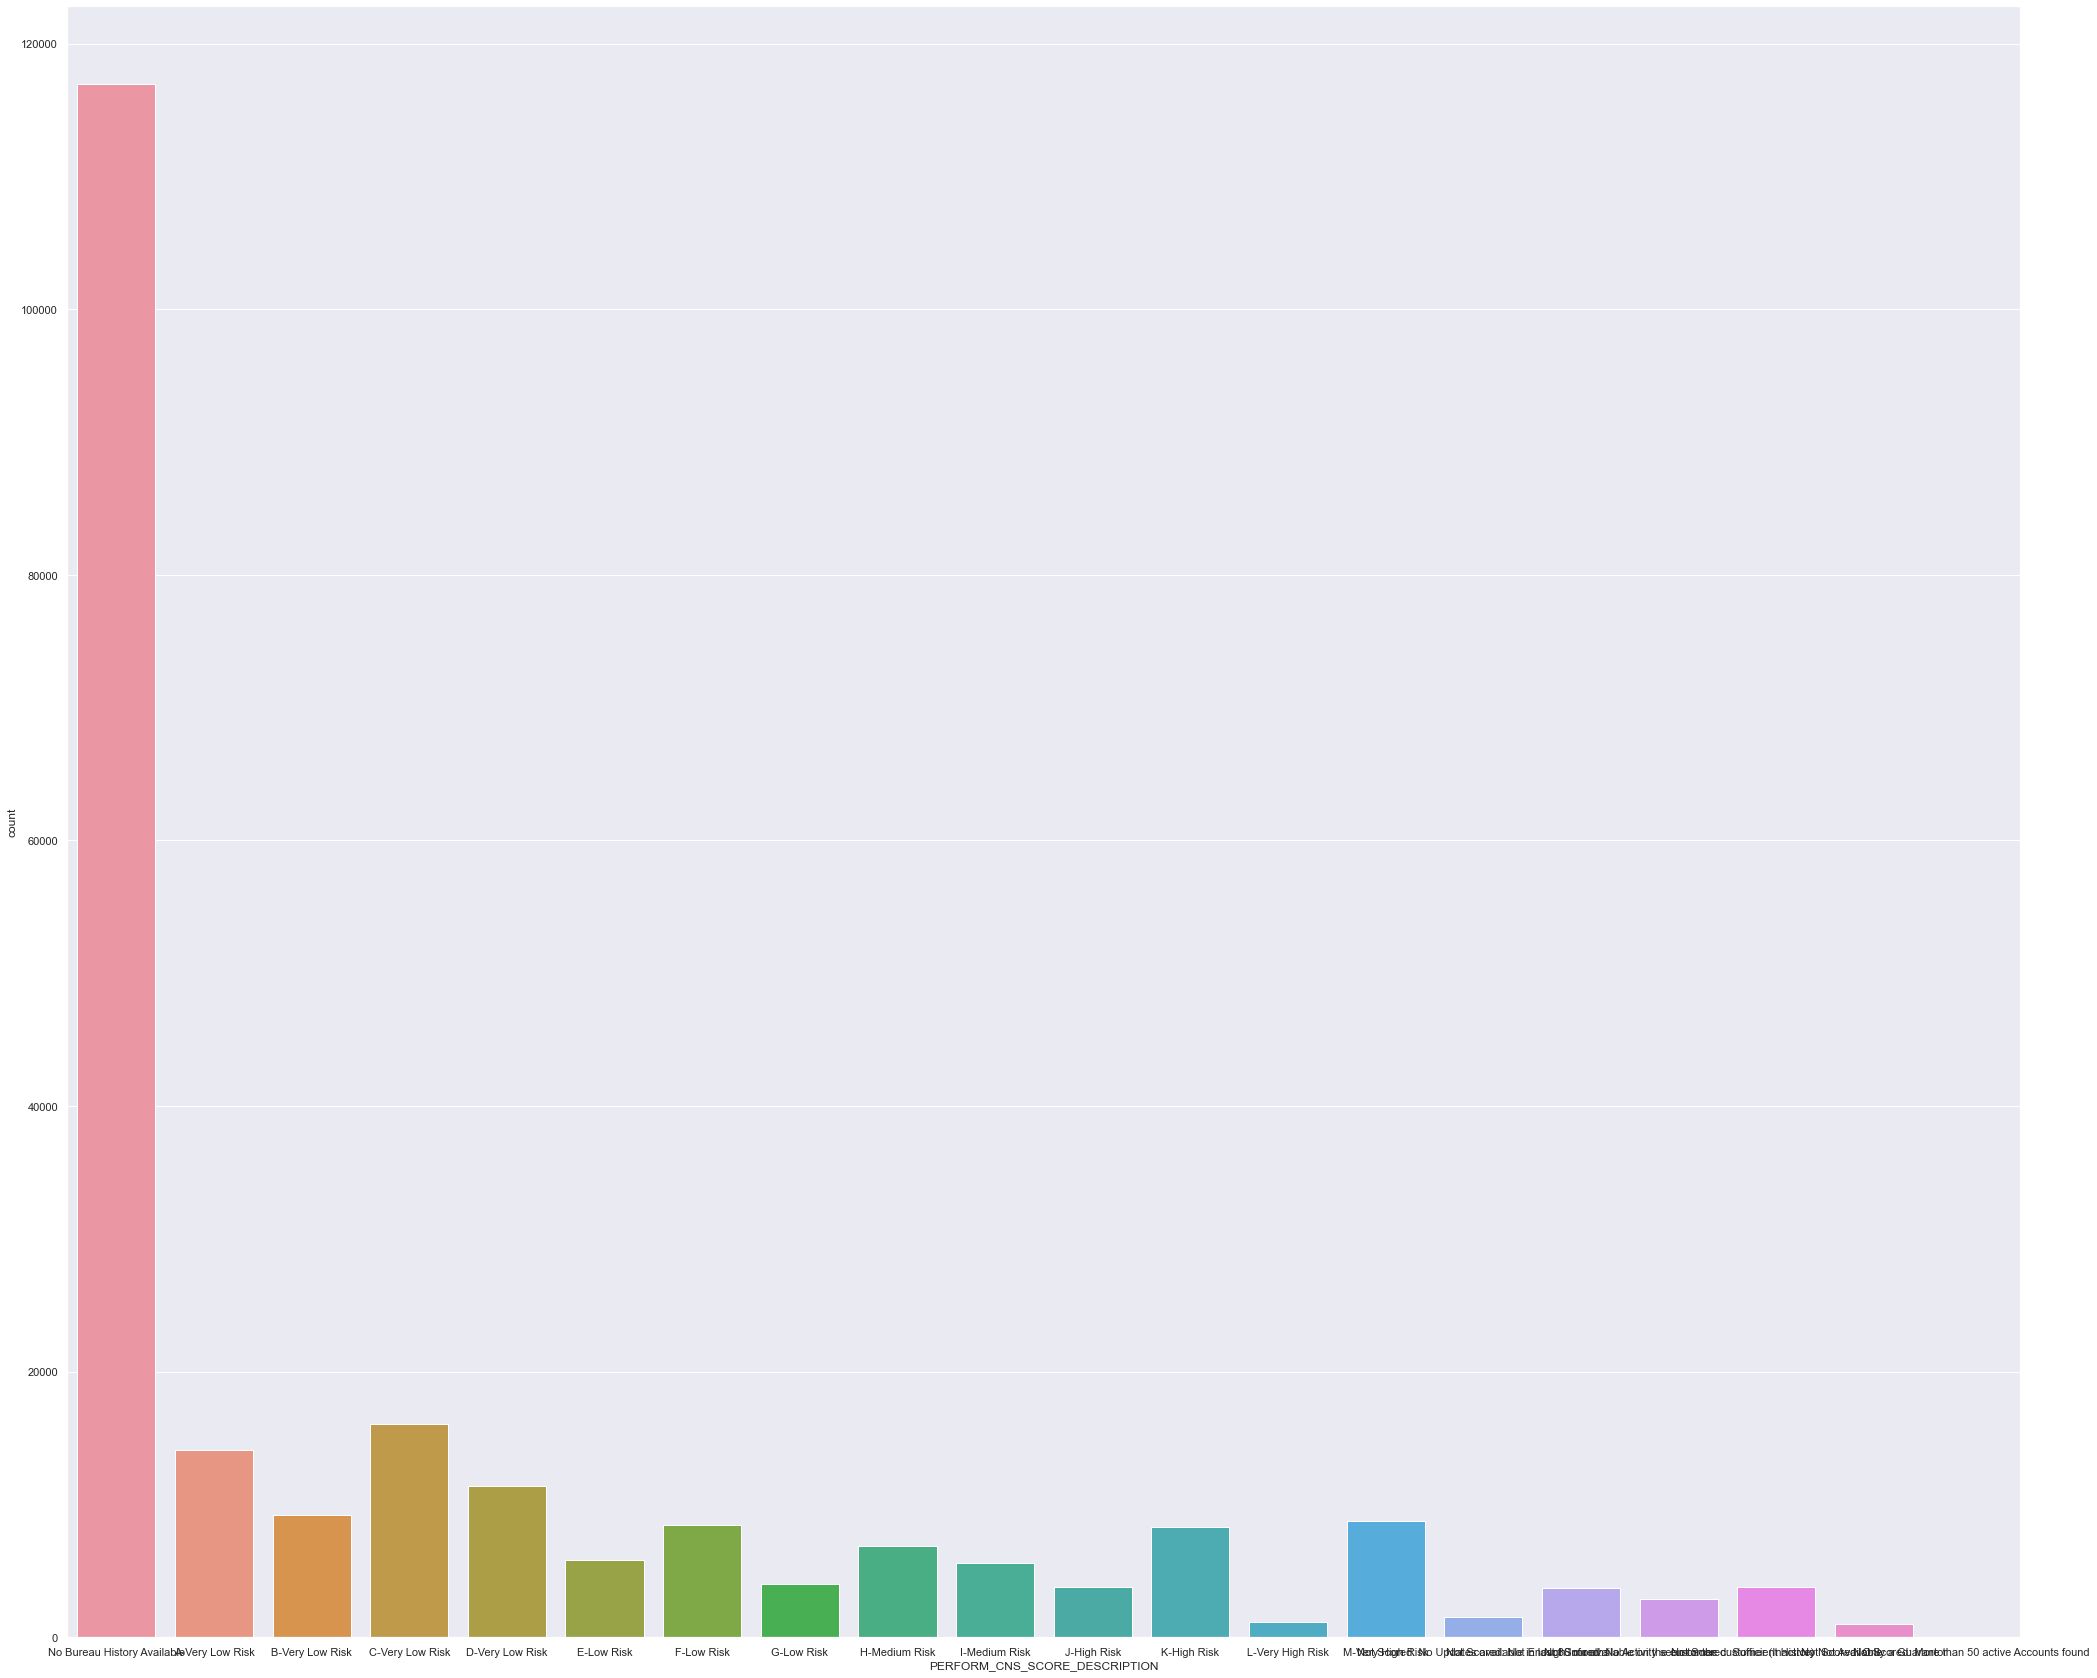

In [39]:
sns.set(rc={'figure.figsize':(35,30)})
sns.countplot(data["PERFORM_CNS_SCORE_DESCRIPTION"])

In [40]:
data["PERFORM_CNS_SCORE_DESCRIPTION"].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

Very high risk customers are 1134 and High risk customers are 8277, so we have total 9411 high risk customers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PERFORM_CNS_SCORE_DESCRIPTION', ylabel='count'>

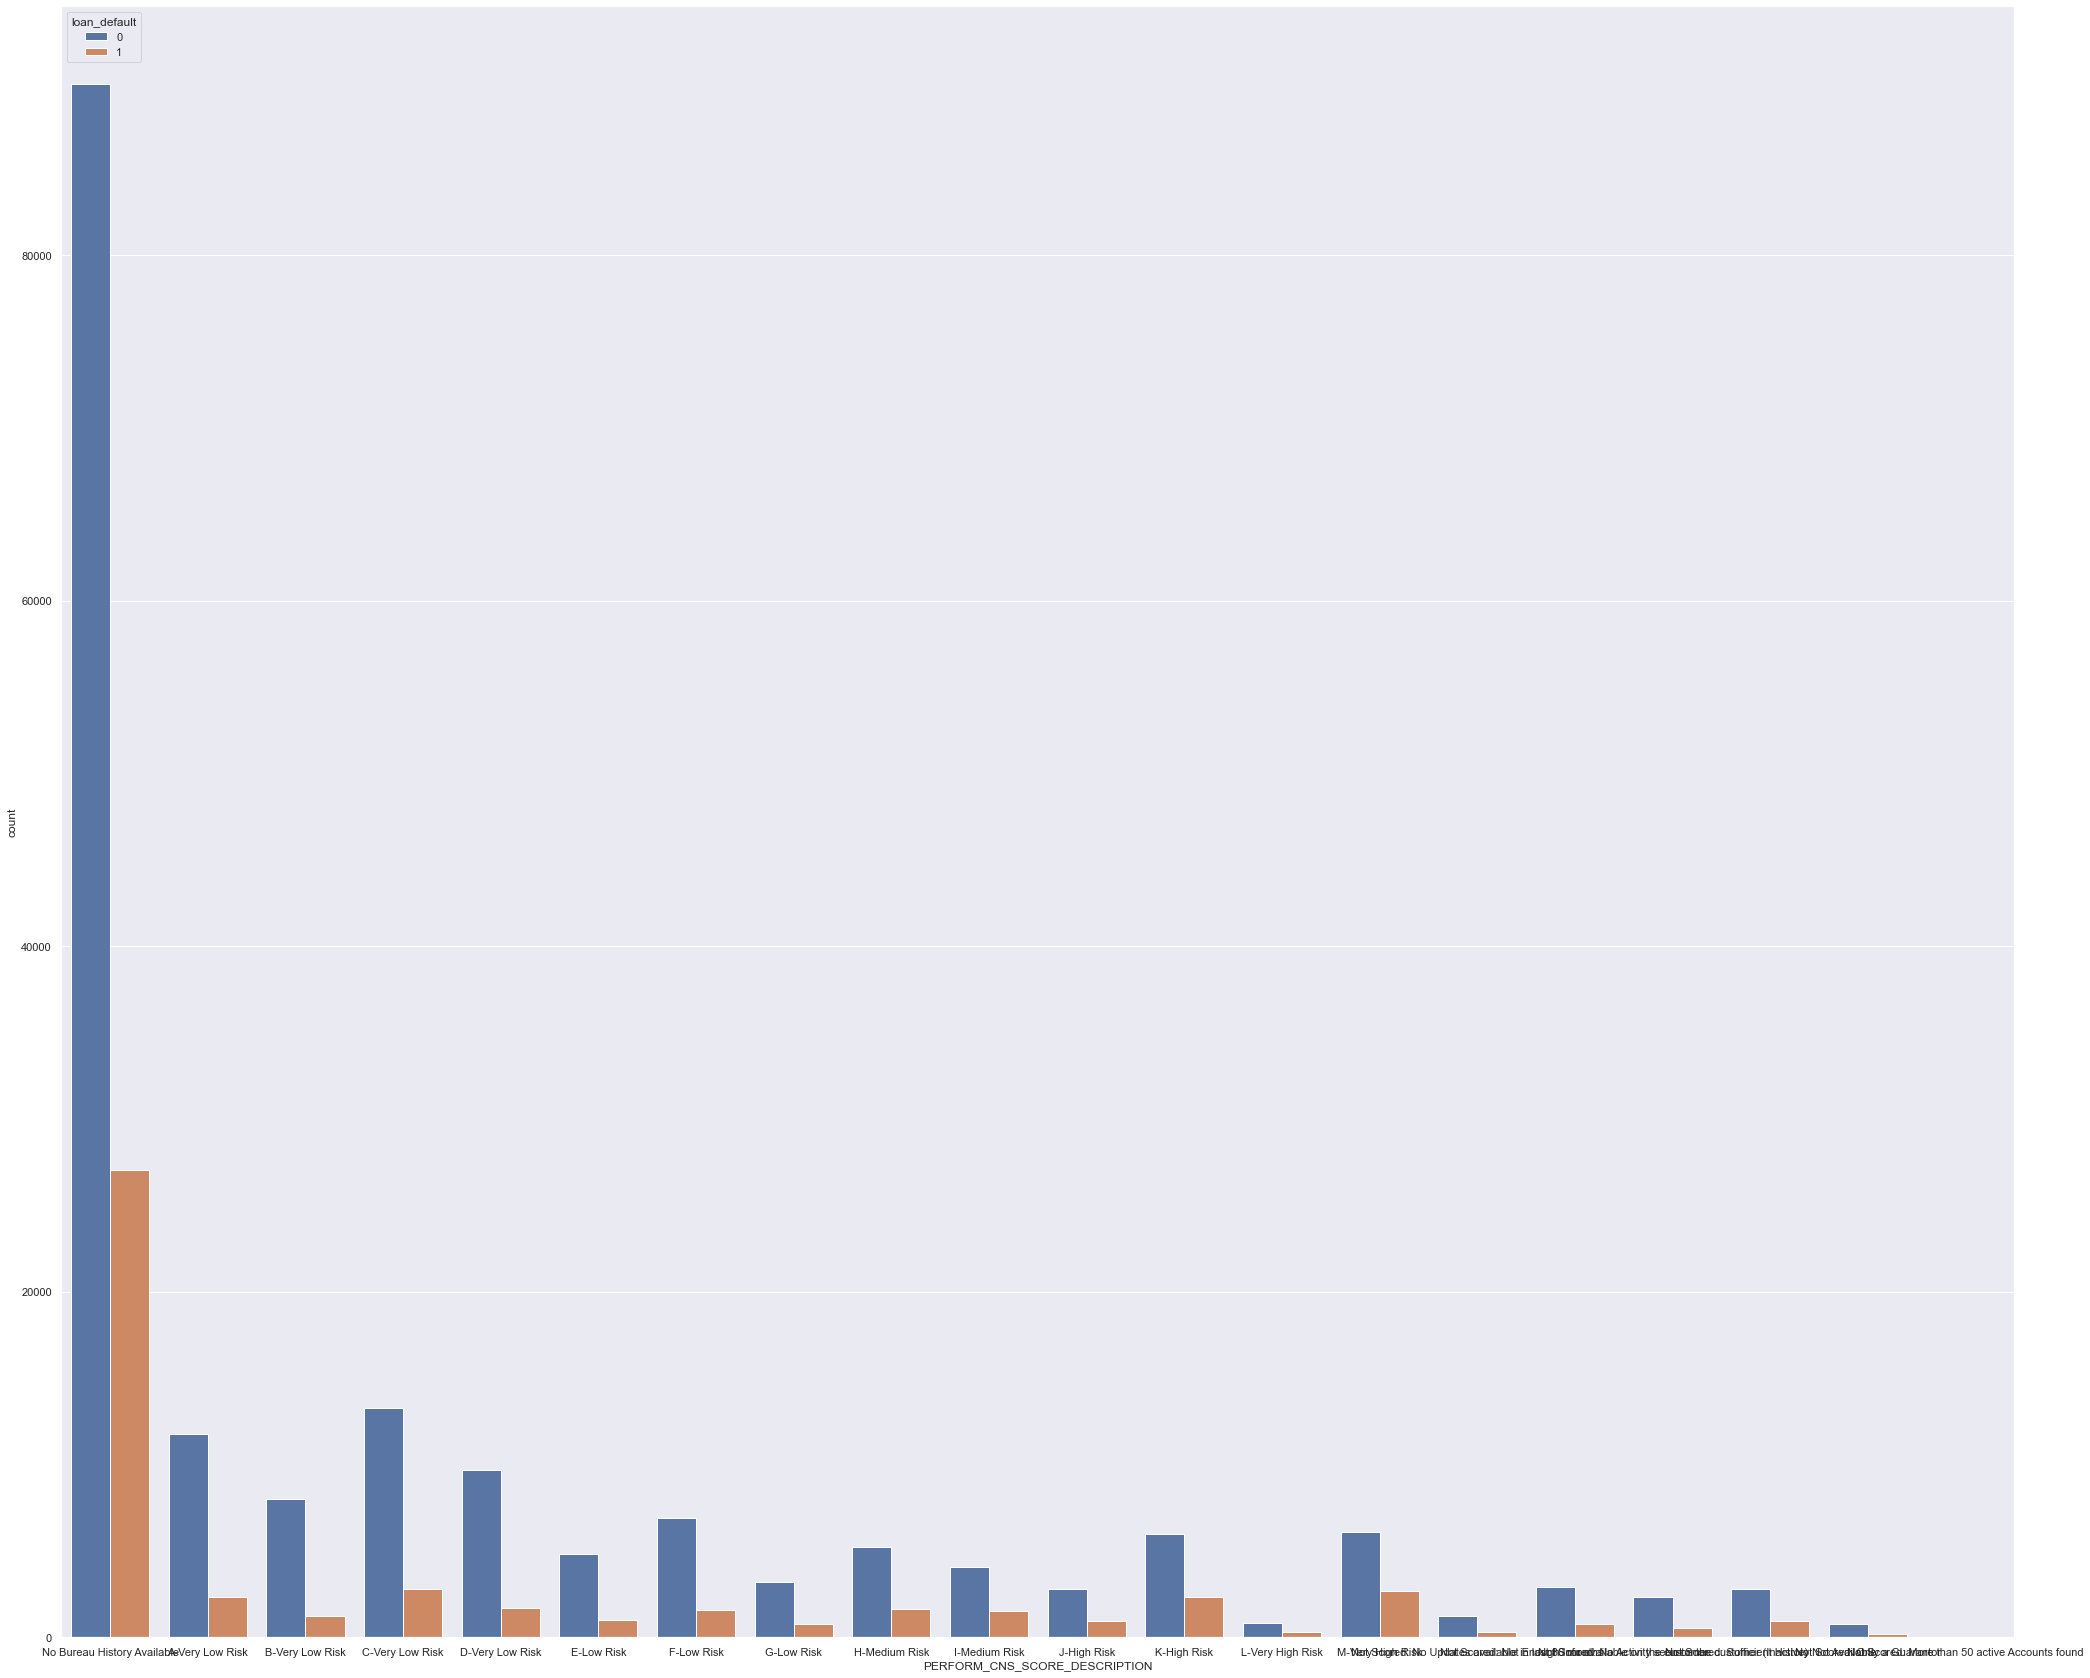

In [41]:
#credit bureau score distribution for defaulters vs. non-defaulters
sns.set(rc={'figure.figsize':(35,30)})
sns.countplot(data["PERFORM_CNS_SCORE_DESCRIPTION"],hue=data["loan_default"])

### Explore the primary and secondary account details. Is the information in some way related to the loan default probability?

In [42]:
import scipy.stats as stats

In [43]:
data['PRI_SANCTIONED_AMOUNT'] = data['PRI_SANCTIONED_AMOUNT'].astype(str).astype(int)
data['SEC_SANCTIONED_AMOUNT'] = data['SEC_SANCTIONED_AMOUNT'].astype(str).astype(int)

In [51]:
### Sanctioned and disbursed amount of primary Loans relation
_,p_value=stats.ttest_rel(a=data["PRI_SANCTIONED_AMOUNT"],b=data["PRI_DISBURSED_AMOUNT"])

In [52]:
print(p_value)

0.07550682707997997


In [47]:
if p_value<0.05:
    print("Reject Ho,There is significant difference between primary loan sanctioned and disbursed")
else:
    print("Accept Ho,There is no significant difference between primary loan sanctioned and disbursed")

Accept Ho,There is no significant difference between primary loan sanctioned and disbursed


In [49]:
### Sanctioned and disbursed amount of secondary Loans relation
_,p_value=stats.ttest_rel(a=data["SEC_SANCTIONED_AMOUNT"],b=data["SEC_DISBURSED_AMOUNT"])

In [50]:
print(p_value)

2.8873358771164625e-30


In [53]:
if p_value<0.05:
    print("Reject Ho,There is significant difference between secondary loan sanctioned and disbursed")
else:
    print("Accept Ho,There is no significant difference between secondary loan sanctioned and disbursed")

Accept Ho,There is no significant difference between secondary loan sanctioned and disbursed


In [55]:
data["SEC_Diff"]=data["SEC_SANCTIONED_AMOUNT"]-data["SEC_DISBURSED_AMOUNT"]

In [57]:
data["SEC_Diff"].sum()

27028488

In [58]:
data["PRI_SAN_Diff"]=data["PRI_SANCTIONED_AMOUNT"]-data["PRI_DISBURSED_AMOUNT"]

In [60]:
data["PRI_SAN_Diff"].sum()

102111349

### Logistic Regression

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
X=data.iloc[:,[0,1,2,4,5,6,7,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,39]]
y=data.iloc[:,40]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
 
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54676
           1       0.00      0.00      0.00     15271

    accuracy                           0.78     69947
   macro avg       0.39      0.50      0.44     69947
weighted avg       0.61      0.78      0.69     69947

[[54675     1]
 [15271     0]]
0.7816632593249174


After running logistic regression model and Confusion matrix we recieve the score of 78%.

### Visualize the data using Tableau to help user explore data to have a better understanding. Demonstrate the variables associated with each other and factors to build a dashboard
https://public.tableau.com/app/profile/dnyaneshwar.gaikwad/viz/LoanDefaulters_16742321186200/Dashboard1?publish=yes